# Please read carefully and execute the code below

In [ ]:
import pandas as pd
import re
# You already know how to search with RegEx and Python
some_text = "hey, my phone number is 0787654321, bye!"
re.search('\d+', some_text).group(0)


'0787654321'

In [ ]:
# And you already know how to use apply on a Series
dftest = pd.DataFrame({"content": ["my number is 0612345678", "hey, my phone number is 0787654321, bye!"]})
dftest

,content
0,my number is 0612345678
1,"hey, my phone number is 0787654321, bye!"


In [ ]:
# Soo, now, you can use both together
dftest["number"] = dftest["content"].apply(lambda x: re.search('\d+', x).group(0))
dftest

,content,number
0,my number is 0612345678,0612345678
1,"hey, my phone number is 0787654321, bye!",0787654321


# Now it's up to you
We have a dataset with lots of candidates for different jobs ads. We would like to get a DataFrame with different columns. You've to use RegEx and Pandas to create new columns from this dataset.

So what is expected at the end of this quest:

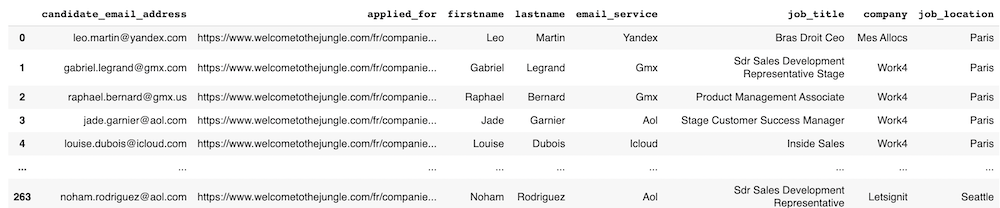

In [ ]:
# Please import the dataset
import pandas as pd
import re

df = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/candidates_df.csv')
df

,candidate_email_address,applied_for
0,leo.martin@yandex.com,https://www.welcometothejungle.com/fr/companie...
1,gabriel.legrand@gmx.com,https://www.welcometothejungle.com/fr/companie...
2,raphael.bernard@gmx.us,https://www.welcometothejungle.com/fr/companie...
3,jade.garnier@aol.com,https://www.welcometothejungle.com/fr/companie...
4,louise.dubois@icloud.com,https://www.welcometothejungle.com/fr/companie...
...,...,...
263,noham.rodriguez@aol.com,https://www.welcometothejungle.com/fr/companie...
264,younes.marie@hotmail.com,https://www.welcometothejungle.com/fr/companie...
265,lorenzo.dasilva@outlook.com,https://www.welcometothejungle.com/fr/companie...
266,melina.barbier@gmail.com,https://www.welcometothejungle.com/fr/companie...


In [ ]:
# unpack email infos with RegEx
# We would like to have one column for firstname, one column for lastname and one column for email provider

test = 'leo.martin@yandex.com'

re.findall('\w+[^.@]', test)

['leo', 'martin', 'yandex', 'com']

In [ ]:
df['firstname'] = df['candidate_email_address'].apply(lambda x : (re.findall('\w+[^.@]', x)[0]).capitalize())
df['lastname'] = df['candidate_email_address'].apply(lambda x : (re.findall('\w+[^.@]', x)[1]).capitalize())
df['email_service'] = df['candidate_email_address'].apply(lambda x : (re.findall('\w+[^.@]', x)[2]).capitalize())

In [ ]:
df

,candidate_email_address,applied_for,firstname,lastname,email_service
0,leo.martin@yandex.com,https://www.welcometothejungle.com/fr/companie...,Leo,Martin,Yandex
1,gabriel.legrand@gmx.com,https://www.welcometothejungle.com/fr/companie...,Gabriel,Legrand,Gmx
2,raphael.bernard@gmx.us,https://www.welcometothejungle.com/fr/companie...,Raphael,Bernard,Gmx
3,jade.garnier@aol.com,https://www.welcometothejungle.com/fr/companie...,Jade,Garnier,Aol
4,louise.dubois@icloud.com,https://www.welcometothejungle.com/fr/companie...,Louise,Dubois,Icloud
...,...,...,...,...,...
263,noham.rodriguez@aol.com,https://www.welcometothejungle.com/fr/companie...,Noham,Rodriguez,Aol
264,younes.marie@hotmail.com,https://www.welcometothejungle.com/fr/companie...,Younes,Marie,Hotmail
265,lorenzo.dasilva@outlook.com,https://www.welcometothejungle.com/fr/companie...,Lorenzo,Dasilva,Outlook
266,melina.barbier@gmail.com,https://www.welcometothejungle.com/fr/companie...,Melina,Barbier,Gmail


In [ ]:
# unpack URL infos with RegEx
# We would like to have one column for job title, one column for company and one column for job location



In [ ]:
df['applied_for'][0]

'https://www.welcometothejungle.com/fr/companies/mes-allocs/jobs/bras-droit-ceo_paris'

In [ ]:
test_url = 'https://www.welcometothejungle.com/fr/companies/mes-allocs/jobs/bras-droit-ceo_paris'

In [ ]:
re.findall('\w+[^/_]+', test_url)

['https:',
 'www.welcometothejungle.com',
 'fr',
 'companies',
 'mes-allocs',
 'jobs',
 'bras-droit-ceo',
 '_paris']

In [ ]:
df['job_title'] = df['applied_for'].apply(lambda x : (re.findall('\w+[^/_]+', x.replace('-', ' '))[-2]).title())
df['company'] = df['applied_for'].apply(lambda x : (re.findall('\w+[^/_]+', x.replace('-', ' '))[4]).title())

In [ ]:
#replace is outside because of regex which already contains "_"
df['job_location'] = df['applied_for'].apply(lambda x : (re.findall('\w+[^/_]+', x)[-1]).replace("_", "").capitalize())

In [ ]:
#Just here to test my problem with "_"
df['applied_for'].apply(lambda x : re.findall('\w+[^/_]+', x.replace('_', ' '))[-1])

0                                  bras-droit-ceo paris
1      sdr-sales-development-representative-stage paris
2                    product-management-associate paris
3                  stage-customer-success-manager paris
4                                    inside-sales paris
                             ...                       
263        sdr-sales-development-representative seattle
264                     inside-sales-mid-market seattle
265      project-analyst-in-san-francisco san-francisco
266                               general-counsel paris
267                 account-executive-smb-us-f-h boston
Name: applied_for, Length: 268, dtype: object

In [ ]:
df

,candidate_email_address,applied_for,firstname,lastname,email_service,job_title,company,job_location
0,leo.martin@yandex.com,https://www.welcometothejungle.com/fr/companie...,Leo,Martin,Yandex,Bras Droit Ceo,Mes Allocs,Paris
1,gabriel.legrand@gmx.com,https://www.welcometothejungle.com/fr/companie...,Gabriel,Legrand,Gmx,Sdr Sales Development Representative Stage,Work4,Paris
2,raphael.bernard@gmx.us,https://www.welcometothejungle.com/fr/companie...,Raphael,Bernard,Gmx,Product Management Associate,Work4,Paris
3,jade.garnier@aol.com,https://www.welcometothejungle.com/fr/companie...,Jade,Garnier,Aol,Stage Customer Success Manager,Work4,Paris
4,louise.dubois@icloud.com,https://www.welcometothejungle.com/fr/companie...,Louise,Dubois,Icloud,Inside Sales,Work4,Paris
...,...,...,...,...,...,...,...,...
263,noham.rodriguez@aol.com,https://www.welcometothejungle.com/fr/companie...,Noham,Rodriguez,Aol,Sdr Sales Development Representative,Letsignit,Seattle
264,younes.marie@hotmail.com,https://www.welcometothejungle.com/fr/companie...,Younes,Marie,Hotmail,Inside Sales Mid Market,Letsignit,Seattle
265,lorenzo.dasilva@outlook.com,https://www.welcometothejungle.com/fr/companie...,Lorenzo,Dasilva,Outlook,Project Analyst In San Francisco,Fabernovel,San-francisco
266,melina.barbier@gmail.com,https://www.welcometothejungle.com/fr/companie...,Melina,Barbier,Gmail,General Counsel,Jus Mundi,Paris


In [ ]:
df.applied_for.value_counts()

https://www.welcometothejungle.com/fr/companies/work4/jobs/sdr-sales-development-representative-stage_paris                      1
https://www.welcometothejungle.com/fr/companies/convelio/jobs/talent-aquisition-specialist-full-remote-possible_new-york-city    1
https://www.welcometothejungle.com/fr/companies/akur8/jobs/us-insurance-pricing-expert_new-york                                  1
https://www.welcometothejungle.com/fr/companies/contentsquare/jobs/director-of-sox_new-york                                      1
https://www.welcometothejungle.com/fr/companies/dna-script/jobs/electrical-engineer-m-f_south-san-francisco                      1
                                                                                                                                ..
https://www.welcometothejungle.com/fr/companies/easymovie/jobs/global-sales-enablement-specialist-v-i-e_new-york                 1
https://www.welcometothejungle.com/fr/companies/toucan-toco/jobs/boston-project-man

In [ ]:
df['applied_for'].apply(lambda x : (re.findall('\w+[^/_]+', x)[-1]).replace("_", "").capitalize()) .value_counts()

New-york                     96
Paris                        33
Boston                       30
San-francisco                15
Texas                         9
South-san-francisco           9
New-york-city                 8
Atlanta                       8
Chicago                       6
Seattle                       4
Washington                    4
Lausanne                      3
Denver                        3
Toulouse                      2
Mountain-view                 2
Austin                        2
Iwdyjmywk8                    1
Bm5ardxyr                     1
Didomjzamjag                  1
Didomjwq1zww                  1
Brooklyn                      1
Boston-or-home                1
Bmw9xr2qv                     1
Parisatqyllpgj                1
Toulousessm1drdyn             1
Bm2grm4vj                     1
Tassin-la-demi-lune           1
Iwde8zq6r0                    1
Bostonmirakoy8rvgp            1
Bostonmirak5pzpyrx            1
Bostonmirakr7zelq0            1
Daily1ad